In [36]:
def graph_to_tikz(G):
    """
    Converts a SageMath graph into a TikZ picture with automatic node positioning.
    
    Parameters:
    G (Graph): The SageMath graph object.

    Returns:
    str: The TikZ code for the graph.
    """
    # Get the layout of the graph
    layout = G.layout()

    # Generate TikZ code
    tikz_code = "\\begin{tikzpicture}\n"
    tikz_code += "    \\begin{pgfonlayer}{nodelayer}\n"
    for v, (x, y) in layout.items():
        tikz_code += f"        \\node [style=pinknode] ({v}) at ({x:.2f}, {y:.2f}) {{}};\n"
    tikz_code += "    \\end{pgfonlayer}\n"
    tikz_code += "    \\begin{pgfonlayer}{edgelayer}\n"
    for edge in G.edges():
        u, v = edge[:2]  # Only take the first two elements of the edge tuple
        tikz_code += f"        \\draw [style=blackedge] ({u}) to ({v});\n"
    tikz_code += "    \\end{pgfonlayer}\n"
    tikz_code += "\\end{tikzpicture}"

    return tikz_code

# Example usage
if __name__ == "__main__":
    # Define the graph
    G = Graph()
    G.add_vertices([0, 1, 2, 3, 4, 5])
    G.add_edges([(0, 1), (1, 2), (1, 4), (4, 3), (3, 5), (0, 3), (5, 2)])

    # Get the TikZ code
    tikz_code = graph_to_tikz(G)
    print(tikz_code)
    # Save TikZ code to a file
    with open("graph.tikz", "w") as f:
        f.write(tikz_code)

    print("TikZ code has been saved to graph.tikz")


\begin{tikzpicture}
    \begin{pgfonlayer}{nodelayer}
        \node [style=pinknode] (0) at (1.37, -0.21) {};
        \node [style=pinknode] (1) at (1.11, 0.36) {};
        \node [style=pinknode] (2) at (2.05, 0.94) {};
        \node [style=pinknode] (3) at (2.04, -0.59) {};
        \node [style=pinknode] (4) at (1.00, -0.70) {};
        \node [style=pinknode] (5) at (2.65, 0.20) {};
    \end{pgfonlayer}
    \begin{pgfonlayer}{edgelayer}
        \draw [style=blackedge] (0) to (1);
        \draw [style=blackedge] (0) to (3);
        \draw [style=blackedge] (1) to (2);
        \draw [style=blackedge] (1) to (4);
        \draw [style=blackedge] (2) to (5);
        \draw [style=blackedge] (3) to (4);
        \draw [style=blackedge] (3) to (5);
    \end{pgfonlayer}
\end{tikzpicture}
TikZ code has been saved to graph.tikz


In [38]:
import re

def tikz_to_sage_from_file(tikz_file_path):
    """
    Converts TikZ code from a file into a SageMath graph with node positions, ignoring styles.
    
    Parameters:
    tikz_file_path (str): The path to the TikZ file.

    Returns:
    Graph: The SageMath graph object with node positions.
    dict: Node positions {node: (x, y)}.
    """
    # Read the TikZ code from file
    with open(tikz_file_path, 'r') as file:
        tikz_code = file.read()
    
    # Regular expressions to capture nodes and edges
    node_pattern = re.compile(r'\\node \[.*?\] \((\d+)\) at \(([-\d.]+), ([-\d.]+)\) \{\};')
    #edge_pattern = re.compile(r'\\draw \[?.*?\]? \((\d+)\) to \((\d+)\);')
    edge_pattern = re.compile(r'\\draw(?: \[.*?\])? \((\d+)\) to \((\d+)\);')
    nodes = {}
    edges = []
    
    # Extract nodes and their positions
    for match in node_pattern.finditer(tikz_code):
        node_id = int(match.group(1))
        x = float(match.group(2))
        y = float(match.group(3))
        nodes[node_id] = (x, y)
    
    # Extract edges
    for match in edge_pattern.finditer(tikz_code):
        u = int(match.group(1))
        v = int(match.group(2))
        edges.append((u, v))
    
    # Create the Sage graph
    G = Graph()
    G.add_vertices(list(nodes.keys()))
    G.add_edges(edges)
    
    # Set the node positions using set_vertex_coordinates
    G.set_pos(nodes)  # Use set_vertex_coordinates to set positions explicitly
    
    # Return graph and node positions
    return G

# Example usage
if __name__ == "__main__":
    # Path to the TikZ file
    tikz_file_path = "graph.tikz"  # Replace with your file path
    
    # Convert TikZ to Sage graph
    G = tikz_to_sage_from_file(tikz_file_path)
    
    # The graph now contains the positions (embedding), and can be used for further analysis
    print(G)


Graph on 50 vertices


In [39]:
g=graphs.HoffmanSingletonGraph()

In [40]:
tikz_code = graph_to_tikz(g)
print(tikz_code)

\begin{tikzpicture}
    \begin{pgfonlayer}{nodelayer}
        \node [style=pinknode] (25) at (0.00, 1.00) {};
        \node [style=pinknode] (26) at (-0.13, 0.99) {};
        \node [style=pinknode] (29) at (-0.25, 0.97) {};
        \node [style=pinknode] (27) at (-0.37, 0.93) {};
        \node [style=pinknode] (28) at (-0.48, 0.88) {};
        \node [style=pinknode] (3) at (-0.59, 0.81) {};
        \node [style=pinknode] (1) at (-0.68, 0.73) {};
        \node [style=pinknode] (4) at (-0.77, 0.64) {};
        \node [style=pinknode] (2) at (-0.84, 0.54) {};
        \node [style=pinknode] (0) at (-0.90, 0.43) {};
        \node [style=pinknode] (30) at (-0.95, 0.31) {};
        \node [style=pinknode] (31) at (-0.98, 0.19) {};
        \node [style=pinknode] (34) at (-1.00, 0.06) {};
        \node [style=pinknode] (32) at (-1.00, -0.06) {};
        \node [style=pinknode] (33) at (-0.98, -0.19) {};
        \node [style=pinknode] (7) at (-0.95, -0.31) {};
        \node [style=pinknode] (5) at 

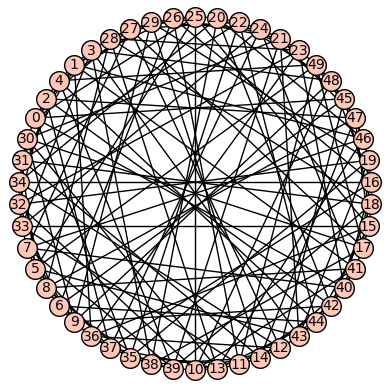

In [41]:
g.show()